In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
#3D and interactive graphic
import plotly.express as px

In [59]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
#Convert TotalCharges to integer
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [64]:
df.shape

(7043, 21)

In [65]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [66]:
#check missing values in the data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [67]:
#drop customer ID
df.drop('customerID',axis=1, inplace=True)

In [68]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1.  Demographics
#a) that are most popular with the telco brand

In [70]:
#Replace value of senior citizen with Yes and No
df['SeniorCitizen'].replace(1, 'Yes', inplace=True)
df['SeniorCitizen'].replace(0, 'No', inplace=True)

In [71]:
df[['gender','SeniorCitizen']].value_counts()

gender  SeniorCitizen
Male    No               2981
Female  No               2920
Male    Yes               574
Female  Yes               568
dtype: int64

In [72]:
df['Count']=1

In [73]:
df1=df[['gender','SeniorCitizen','Count']]
df1.groupby(['gender','SeniorCitizen']).count().reset_index()

,gender,SeniorCitizen,Count
0,Female,No,2920
1,Female,Yes,568
2,Male,No,2981
3,Male,Yes,574


Text(0, 0.5, 'No of subscribers')

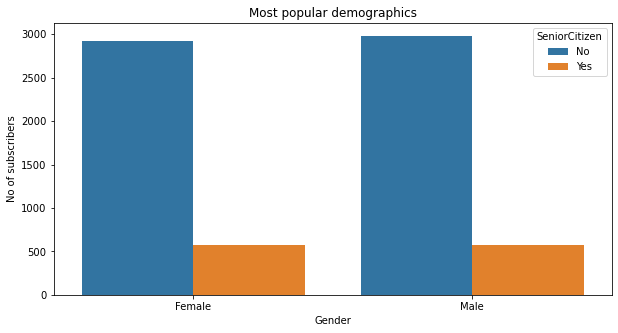

In [54]:
df=df.groupby(['gender','SeniorCitizen'])['Count'].count().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='gender',y='Count',hue='SeniorCitizen', data=df)
plt.title('Most popular demographics')
plt.xlabel('Gender')
plt.ylabel('No of subscribers')

In [20]:
#The telco service is popular among both male and female senior citizen customers

In [ ]:
# b) Customer retention

<AxesSubplot:title={'center':'Tenure vs Churn'}, xlabel='tenure', ylabel='Density'>

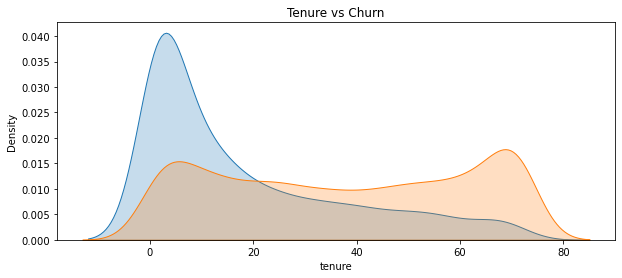

In [74]:
plt.figure(figsize=(10,4))
plt.title('Tenure vs Churn')
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'],label = 'Churn : Yes',shade=True)
sns.kdeplot(df[df['Churn'] == 'No']['tenure'],label = 'Churn : No',shade=True)

In [37]:
#customers with shorter tenure are likley to churn hence marketing should target them to increase retention

# 2. Services

In [77]:

#a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)


In [75]:
churn_df = df[['PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MonthlyCharges','Contract','Churn']][df['Churn']=='Yes']
churn_df.head()

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Contract,Churn
2,Yes,DSL,Yes,Yes,No,No,No,No,53.85,Month-to-month,Yes
4,Yes,Fiber optic,No,No,No,No,No,No,70.70,Month-to-month,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Month-to-month,Yes
8,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Month-to-month,Yes
13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Month-to-month,Yes


In [76]:
df['MonthlyCharges'].max()

118.75

In [78]:
df_maxprice=df[['PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MonthlyCharges','Churn']][df['MonthlyCharges']=='118.75']

df_maxprice

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

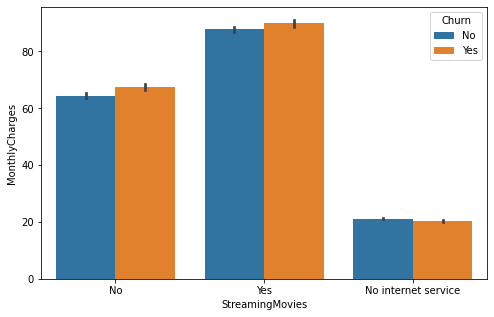

In [83]:
for col in ['PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    
 plt.figure(figsize=(8,5))
sns.barplot(x=col,y='MonthlyCharges',hue='Churn',data=df,palette='tab10')
plt.show()

In [84]:
#b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [86]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0, 0.5, 'No of subscribers')

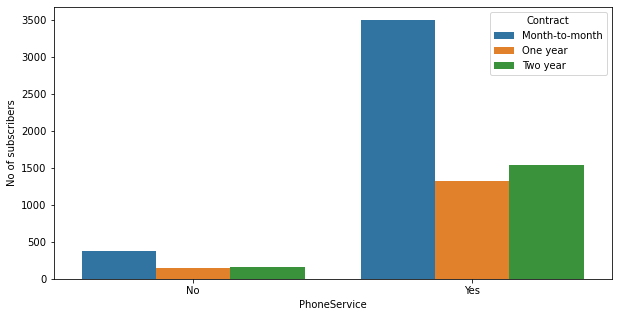

In [88]:
df_Phone=df.groupby(['PhoneService','Contract'])['Count'].count().reset_index()
plt.figure(figsize=(10,5))
sns.countplot(x='PhoneService',hue='Contract',data=df)
plt.xlabel('PhoneService')
plt.ylabel('No of subscribers')

In [94]:
#Payment: (Use visualizations in explaining your analysis)
#a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
  #i. Basic
 # ii. Plus
 # iii. Premium


In [93]:
df2=df[['MonthlyCharges','Churn','Count']]
df2.groupby(['MonthlyCharges','Churn']).count().reset_index()

,MonthlyCharges,Churn,Count
0,18.25,No,1
1,18.40,No,1
2,18.55,No,1
3,18.70,No,2
4,18.75,No,1
...,...,...,...
2365,118.20,No,1
2366,118.35,Yes,1
2367,118.60,No,2
2368,118.65,No,1


In [91]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0, 'MonthlyCharges')

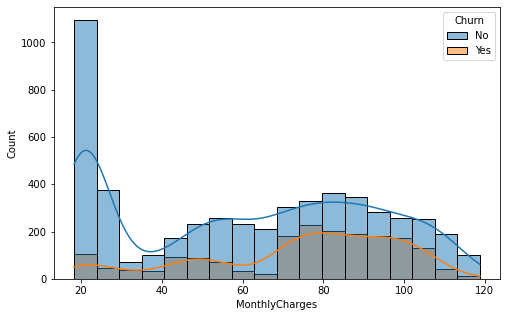

In [92]:
plt.figure(figsize=(8,5))
sns.histplot(x="MonthlyCharges", hue ="Churn", data=df, kde=True,)
plt.xlabel("MonthlyCharges")

In [95]:
 #b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [96]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Text(0, 0.5, 'No of subscribers')

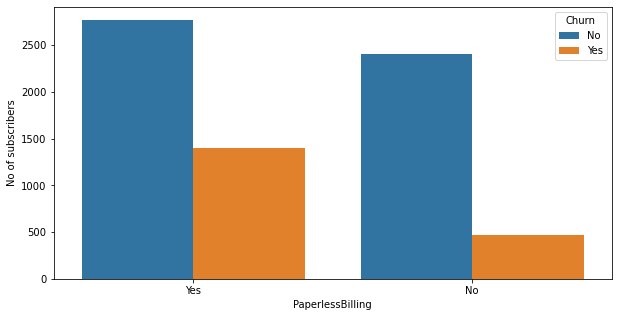

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.xlabel("PaperlessBilling")
plt.ylabel("No of subscribers")

In [98]:
#Strictly paperless billings would lead to more churn